In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [2]:
data1= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv",encoding='ISO-8859-1')

In [3]:
data2= pd.read_excel("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Country-Code.xlsx")

In [4]:
data= pd.merge(data1,data2)

In [5]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [6]:
data.shape

(9551, 22)

In [7]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [8]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [9]:
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

<AxesSubplot:>

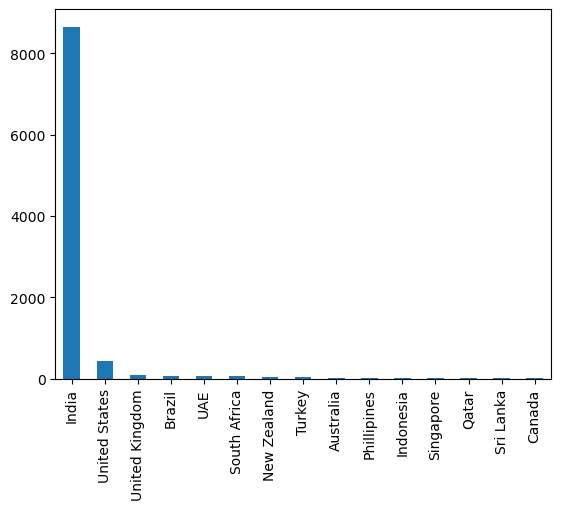

In [10]:
data['Country'].value_counts().plot.bar()

India has the highest number of restaurant according to out dataset.

In [11]:
data['City'].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
                ... 
Huskisson          1
Panchkula          1
Forrest            1
Flaxton            1
Chatham-Kent       1
Name: City, Length: 141, dtype: int64

In [12]:
data['Average Cost for two'].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64

In [13]:
data.drop(['Address','Locality Verbose','Longitude','Latitude','Rating text','Rating color','Votes','Currency'],axis=1,inplace=True)

In [14]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Country
0,6317637,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Yes,No,No,No,3,4.8,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Yes,No,No,No,3,4.5,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.4,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,No,No,No,No,4,4.9,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Yes,No,No,No,4,4.8,Phillipines


In [15]:
data['Locality'].unique()

array(['Century City Mall, Poblacion, Makati City',
       'Little Tokyo, Legaspi Village, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City', ..., 'Ko\x81ôuyolu',
       'Kuruí_e\x81ôme', 'Moda'], dtype=object)

In [16]:
data['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro', 'Sí£o Paulo',
       'Albany', 'Athens', 'Augusta', 'Boise', 'Cedar Rapids/Iowa City',
       'Clatskanie', 'Cochrane', 'Columbus', 'Dalton', 'Davenport',
       'Des Moines', 'Dubuque', 'Fernley', 'Gainesville', 'Lakeview',
       'Lincoln', 'Macon', 'Mc Millan', 'Miller', 'Monroe',
       'Ojo Caliente', 'Orlando', 'Pensacola', 'Pocatello', 'Potrero',
       'Princeton', 'Rest of Hawaii', 'Savannah', 'Sioux City',
       'Tampa Bay', 'Valdosta', 'Vernonia', 'Waterloo', 'Weirton',
       'Winchester Bay', 'Armidale', 'Balingup', 'Beechworth',
       'Dicky Beach', 'East Ballina', 'Flaxton', 'Forrest',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lorn', 'Macedon', 'Mayfield', 'Middleton Beach', 'Montville',
       'Palm Cove', 'Paynesville', 'Penola', 'Phillip Isl

In [17]:
data.drop(['Locality'],axis=1,inplace=True)

In [18]:
data['City'].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
                ... 
Huskisson          1
Panchkula          1
Forrest            1
Flaxton            1
Chatham-Kent       1
Name: City, Length: 141, dtype: int64

In [19]:
City= data['City'].value_counts(ascending=False)

City_lessthan300= City[City<300]
def handle_City(value):
    if(value in City_lessthan300):
        return 'others'
    else:
        return value
data['City']= data['City'].apply(handle_City)
data['City'].value_counts()

New Delhi    5473
others       1880
Gurgaon      1118
Noida        1080
Name: City, dtype: int64

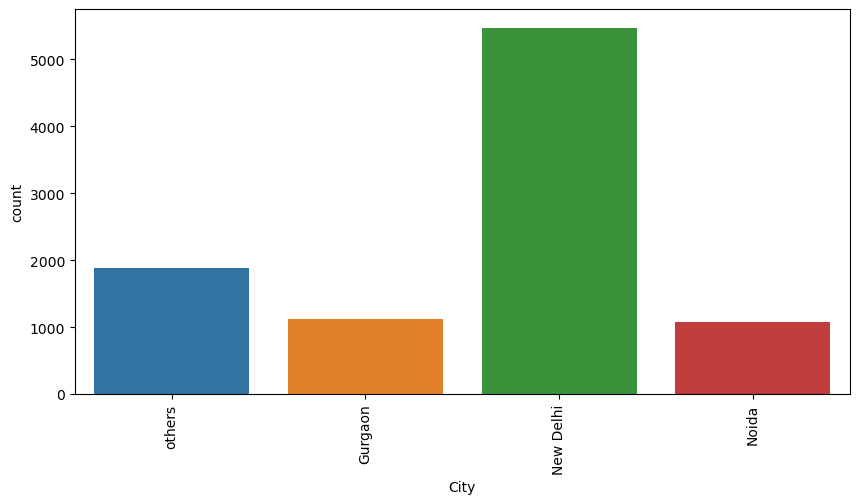

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data['City'])
plt.xticks(rotation=90)
plt.show()

In [21]:
Cuisines= data['Cuisines'].value_counts(ascending=False)

Cuisines_lessthan100= Cuisines[Cuisines<100]
def handle_Cuisines(value):
    if(value in Cuisines_lessthan100):
        return 'others'
    else:
        return value
data['Cuisines']= data['Cuisines'].apply(handle_Cuisines)
data['Cuisines'].value_counts()

others                            5227
North Indian                       936
North Indian, Chinese              511
Fast Food                          354
Chinese                            354
North Indian, Mughlai              334
Cafe                               299
Bakery                             218
North Indian, Mughlai, Chinese     197
Bakery, Desserts                   170
Street Food                        149
Pizza, Fast Food                   131
Chinese, Fast Food                 118
Mithai, Street Food                116
South Indian                       112
Bakery, Fast Food                  108
Chinese, North Indian              105
Mughlai                            103
Name: Cuisines, dtype: int64

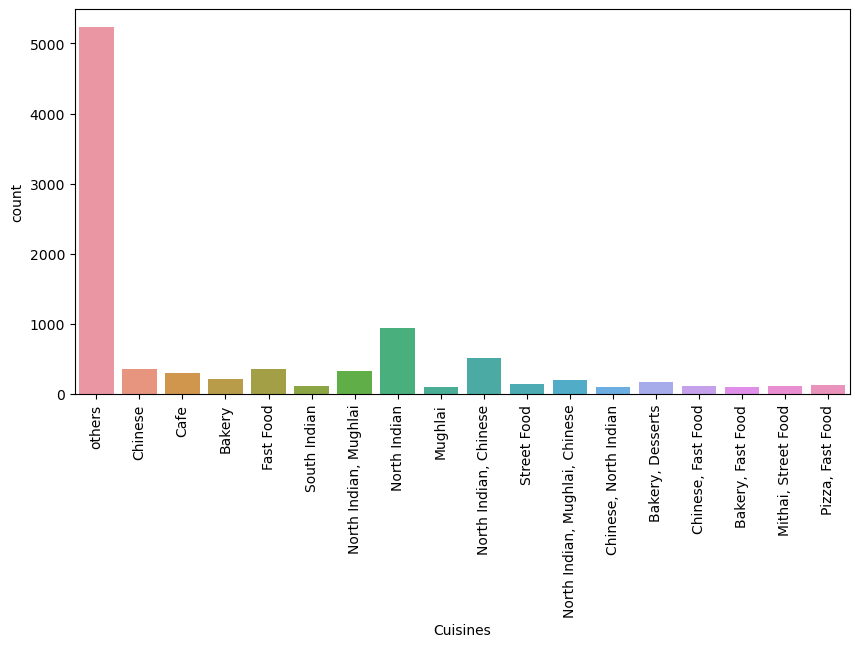

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data['Cuisines'])
plt.xticks(rotation=90)
plt.show()

In [23]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Country
0,6317637,Le Petit Souffle,162,others,others,1100,Yes,No,No,No,3,4.8,Phillipines
1,6304287,Izakaya Kikufuji,162,others,others,1200,Yes,No,No,No,3,4.5,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,others,others,4000,Yes,No,No,No,4,4.4,Phillipines
3,6318506,Ooma,162,others,others,1500,No,No,No,No,4,4.9,Phillipines
4,6314302,Sambo Kojin,162,others,others,1500,Yes,No,No,No,4,4.8,Phillipines


<AxesSubplot:xlabel='Has Table booking', ylabel='count'>

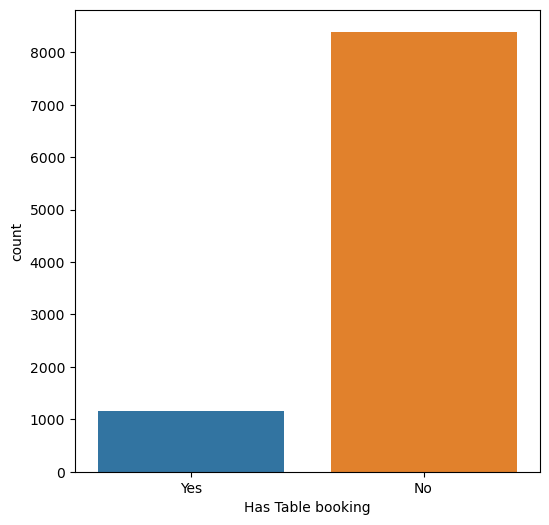

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(data['Has Table booking'])

We can see that most of the restaurnts are not having table bookings.

<AxesSubplot:xlabel='Has Online delivery', ylabel='Aggregate rating'>

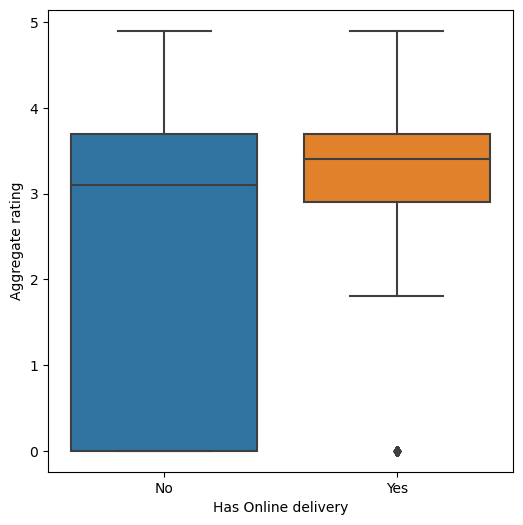

In [25]:
plt.figure(figsize=(6,6))
sns.boxplot(x= 'Has Online delivery', y='Aggregate rating',data=data)

There is no difference in the rating despite the food being delivered online or not.

<AxesSubplot:xlabel='Has Table booking', ylabel='Aggregate rating'>

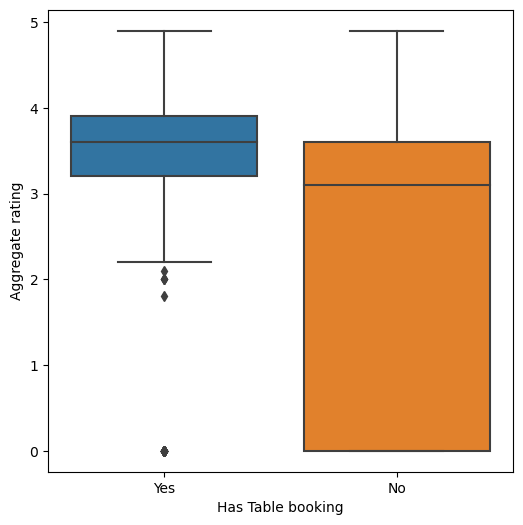

In [26]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Has Table booking',y='Aggregate rating',data=data)

The ratings for restaurants having table booking is more that that of the other.

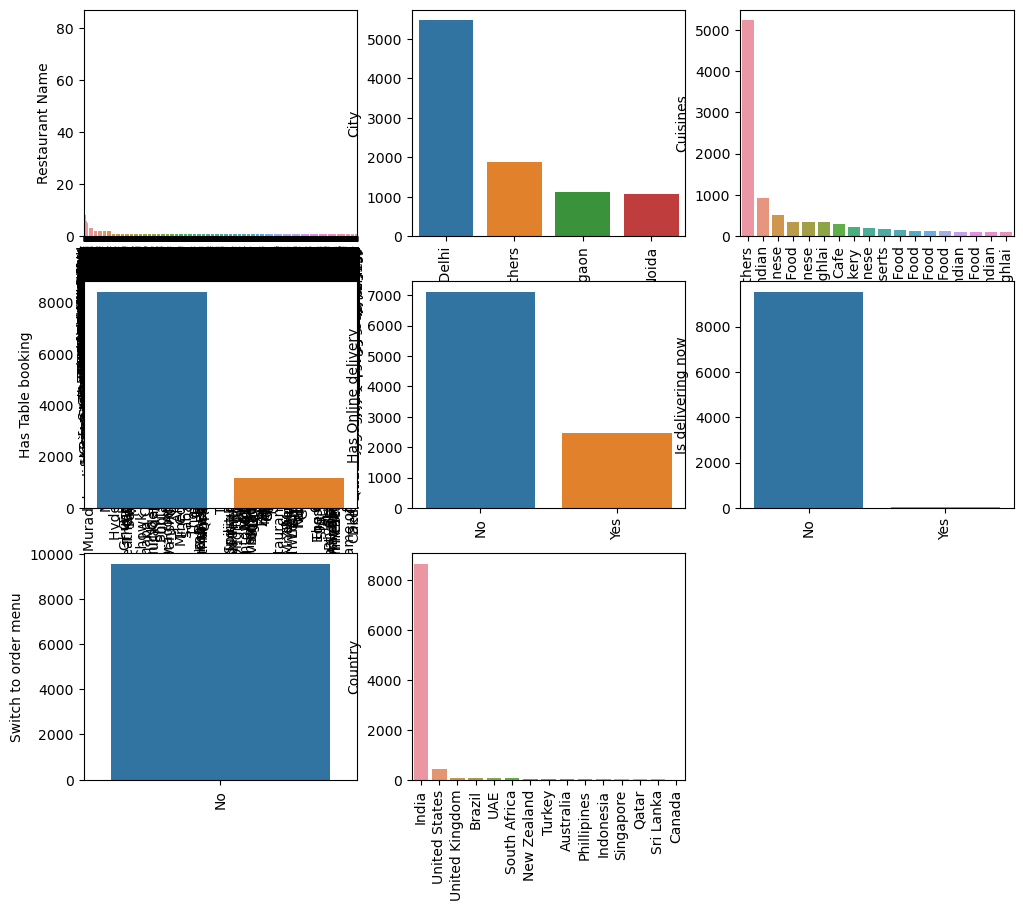

In [33]:
obj= (data.dtypes=='object')
object_cols= list(obj[obj].index)
plt.figure(figsize=(12,10))
index=1
for col in object_cols:
    y=data[col].value_counts()
    plt.subplot(3,3,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index+=1
plt.show()

In [35]:
lab_enc=LabelEncoder()

In [36]:
obj= (data.dtypes=='object')
for col in list(obj[obj].index):
    data[col]= lab_enc.fit_transform(data[col])

<AxesSubplot:>

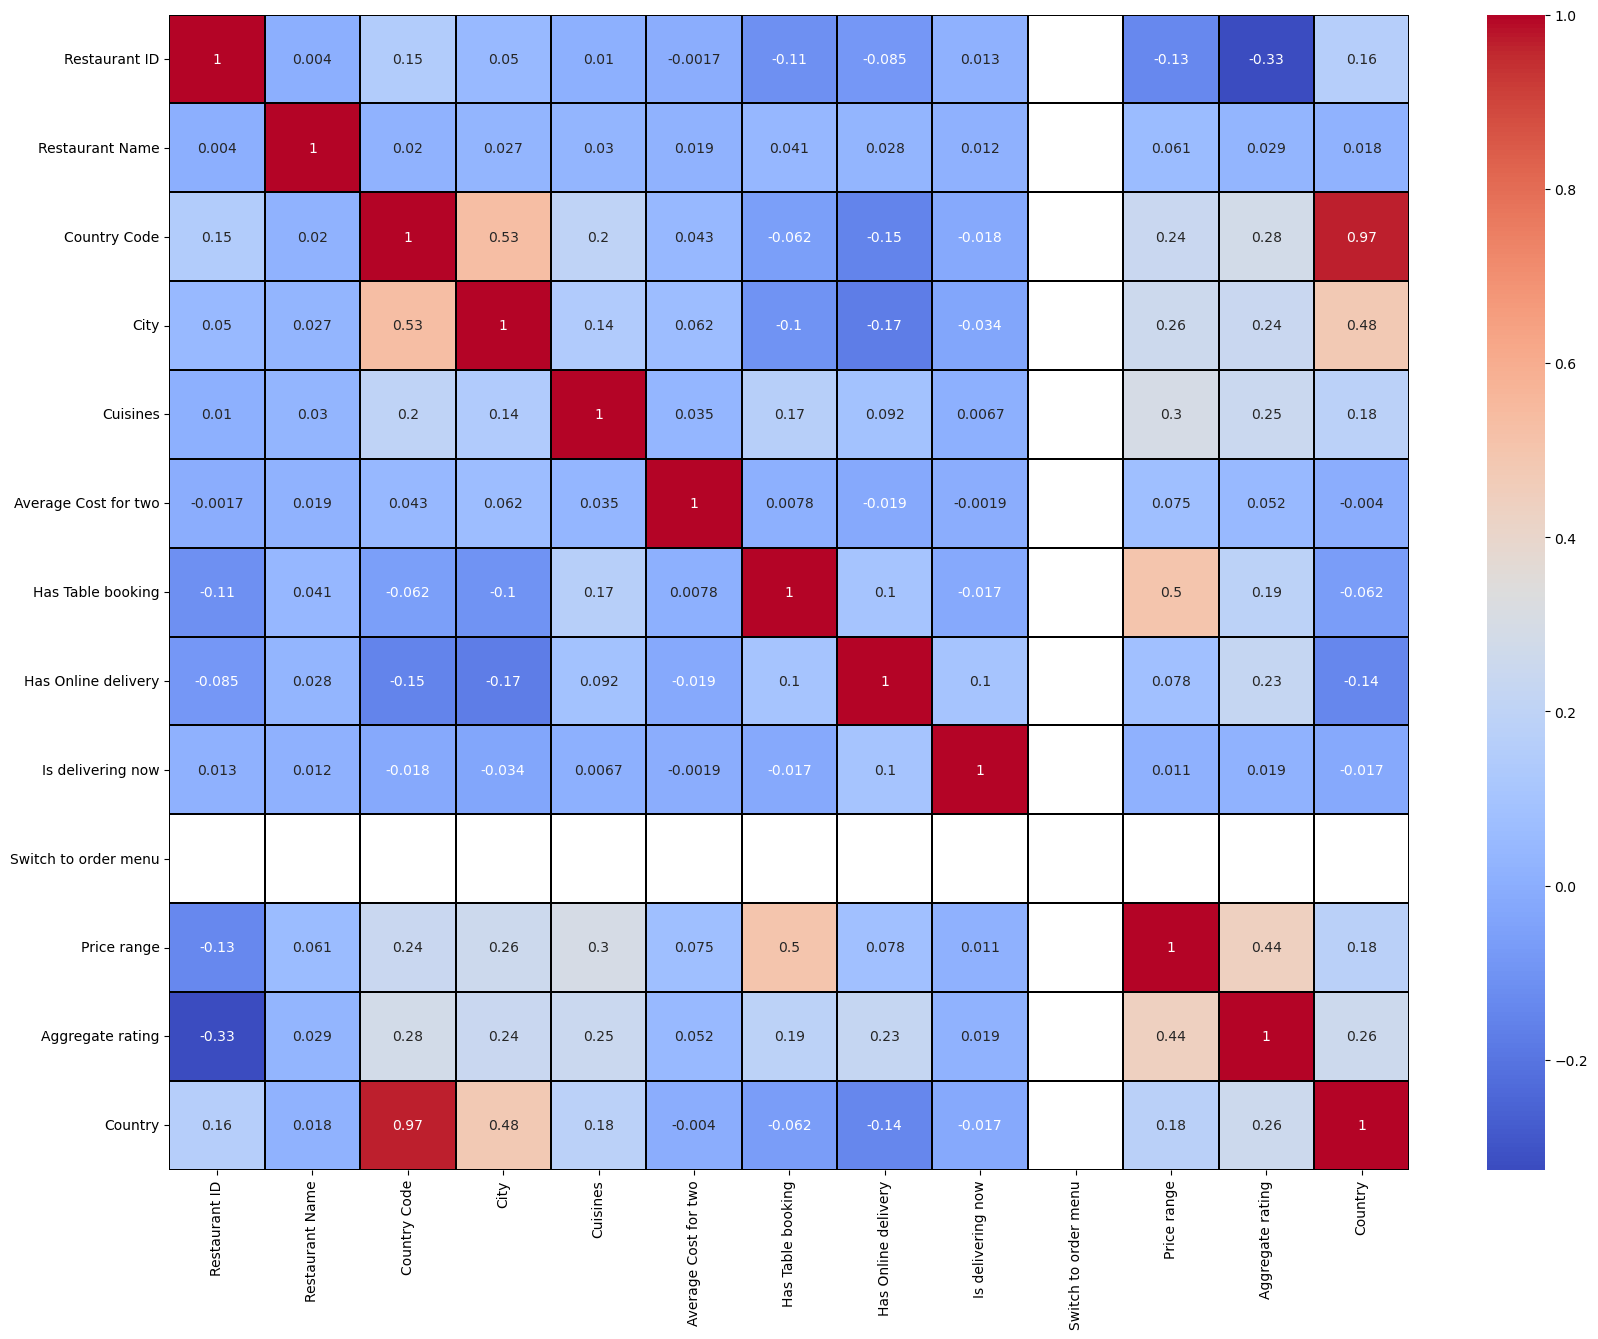

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, cmap= 'coolwarm', linewidths=0.2, linecolor='black' )

The show the correlation of average cost for two as well as price range with other columns of the data.The price range is highly correlated with many factors such as has table booking,aggregate rating, cuisines.

In [46]:
X_s= data[['City','Cuisines','Aggregate rating']]
y_avg= data['Average Cost for two']
y_pr= data['Price range']

In [47]:
scaler= StandardScaler()
X= scaler.fit_transform(X_s)

In [48]:
X_train,X_test,y_avg_train,y_avg_test,y_pr_train,y_pr_test= train_test_split(X, y_avg, y_pr, test_size=0.2, random_state=100)

In [49]:
lr= LinearRegression()
rfc= RandomForestRegressor()
knn= KNeighborsRegressor()
dtc= DecisionTreeRegressor()

In [50]:
cls= {'Linear Regression':lr, 'Random Forest Regressor':rfc, 'KNeighborsRegressor':knn, 'Decision Tree Regressor':dtc}

In [51]:
for name, regressor in cls.items():
    regressor.fit(X_train,y_avg_train)
    y_avg_pred= regressor.predict(X_train)
    y_avg_mse= mean_squared_error(y_avg_train,y_avg_pred)
    print(f"{name} - Mean Squared Error: {y_avg_mse}")

Linear Regression - Mean Squared Error: 283666652.39667386
Random Forest Regressor - Mean Squared Error: 279105692.4181176
KNeighborsRegressor - Mean Squared Error: 446080895.79213095
Decision Tree Regressor - Mean Squared Error: 279081761.55193794


In [52]:
for name, regressor in cls.items():
    regressor.fit(X_train,y_pr_train)
    y_pr_pred= regressor.predict(X_train)
    y_pr_mse= mean_squared_error(y_pr_train,y_pr_pred)
    print(f"{name}- Mean Squared Error: {y_pr_mse}")

Linear Regression- Mean Squared Error: 0.6217508354561394
Random Forest Regressor- Mean Squared Error: 0.47938131756396507
KNeighborsRegressor- Mean Squared Error: 0.5831675392670158
Decision Tree Regressor- Mean Squared Error: 0.4751642261683785


In [53]:
for name, regressor in cls.items():
    regressor.fit(X_train,y_avg_train)
    y_avg_pred= regressor.predict(X_test)
    y_avg_mse= mean_squared_error(y_avg_test,y_avg_pred)
    print(f"{name}- Mean squared Error: {y_avg_mse}")

Linear Regression- Mean squared Error: 157378837.74535963
Random Forest Regressor- Mean squared Error: 152240977.4182849
KNeighborsRegressor- Mean squared Error: 265113133.46034536
Decision Tree Regressor- Mean squared Error: 152215173.38040707


In [55]:
for name, regressor in cls.items():
    regressor.fit(X_train,y_pr_train)
    y_pr_pred= regressor.predict(X_test)
    y_pr_mse= mean_squared_error(y_pr_test,y_pr_pred)
    print(f"{name}- Mean Squared Error: {y_pr_mse}")

Linear Regression- Mean Squared Error: 0.5926662468372014
Random Forest Regressor- Mean Squared Error: 0.5542076592553262
KNeighborsRegressor- Mean Squared Error: 0.6181894296180012
Decision Tree Regressor- Mean Squared Error: 0.5763260082937656
